# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Homework 3 submission</b></u>

### Roster Name: Andrew Vu
### Student ID: 015055911
### Email address: andrew.k.vu@sjsu.edu
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

- regression boston file from files section

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [234]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [235]:
np.random.seed(42)

#### Code the solution

## 1. Load Dataset

In [236]:
concrete_file = pd.read_csv(r'C:\Users\Andrew\CS156 Jupyter Files\hw3usefulfiles\homework3_input_data.csv')

In [237]:
df = pd.DataFrame(concrete_file, columns=concrete_file.columns)
df.head()
feature_names = ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age']
X = df[feature_names]
Y = df['csMPa']
#print(df.head())
#print(X)

In [238]:
print(df.columns)
df.describe()

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## 2. Plot Independent vs. Dependent Var

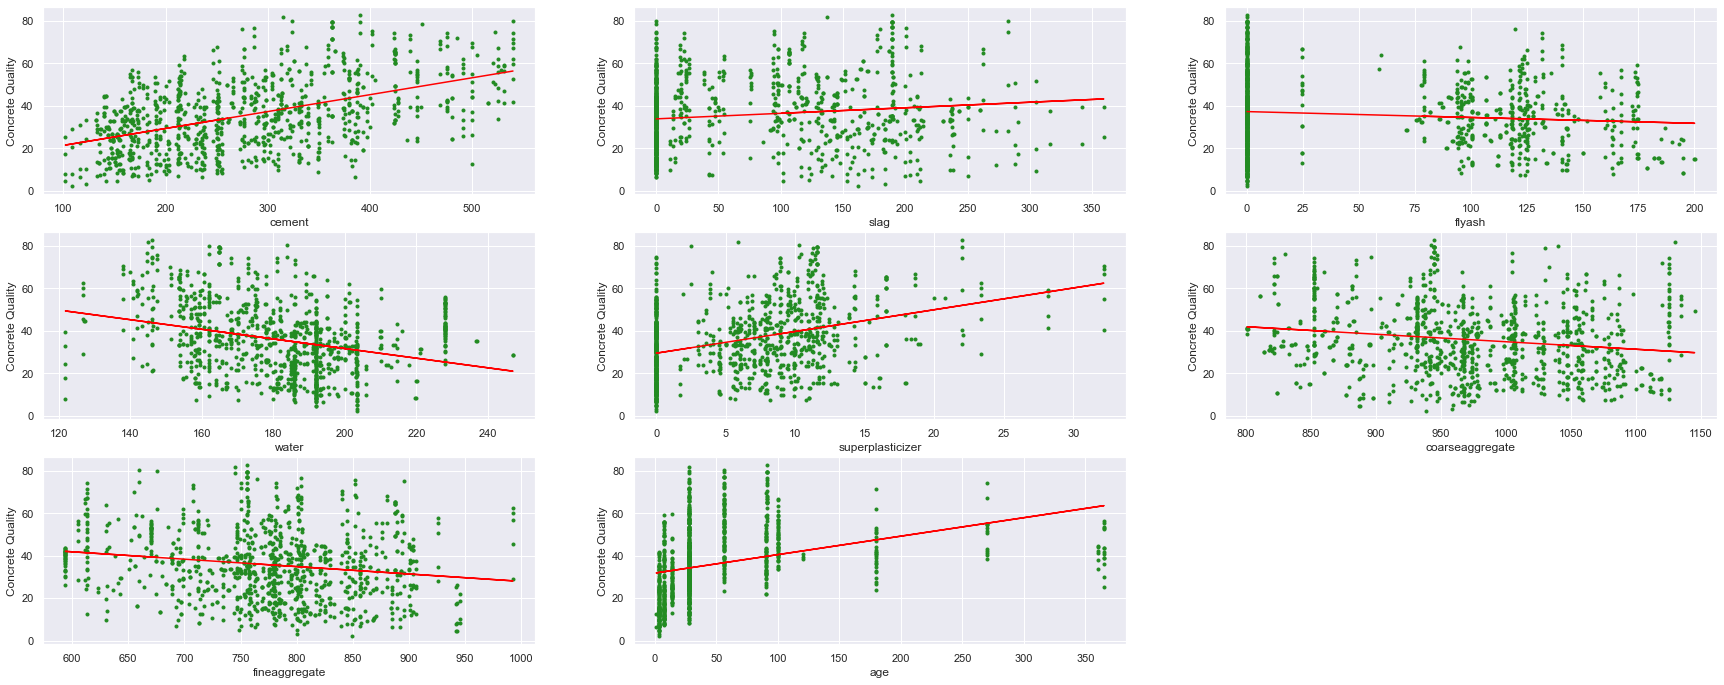

In [239]:
plt.figure(figsize=(30,20))
for i, col in enumerate(df.columns[0:8]):
    plt.subplot(5, 3, i+1)
    x = df[col]
    y = df['csMPa']
    plt.plot(x, y, '.', color="forestgreen")
    # create linear regression line:
    #plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color="red")
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color="red")
    plt.xlabel(col)
    plt.ylabel('Concrete Quality')

## 3. Correlation Matrix of Independent Vars

<AxesSubplot:>

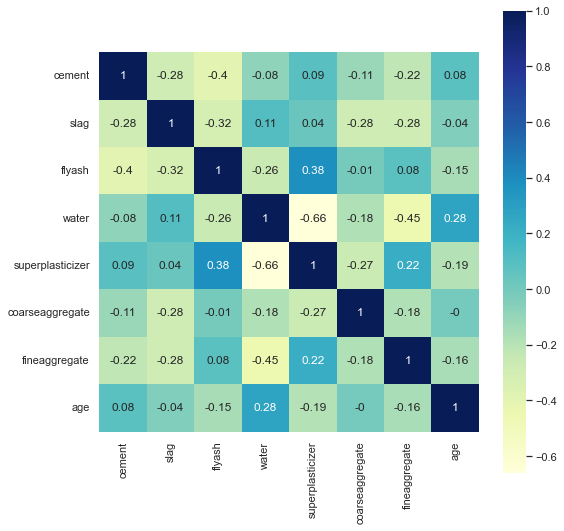

In [240]:
features = df[feature_names]
sns.set(rc={'figure.figsize': (8.5,8.5)})
sns.heatmap(features.corr().round(2), square=True, cmap='YlGnBu', annot=True)

## 4. Training and Test Datasets

In [241]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((824, 8), (824,), (206, 8), (206,))

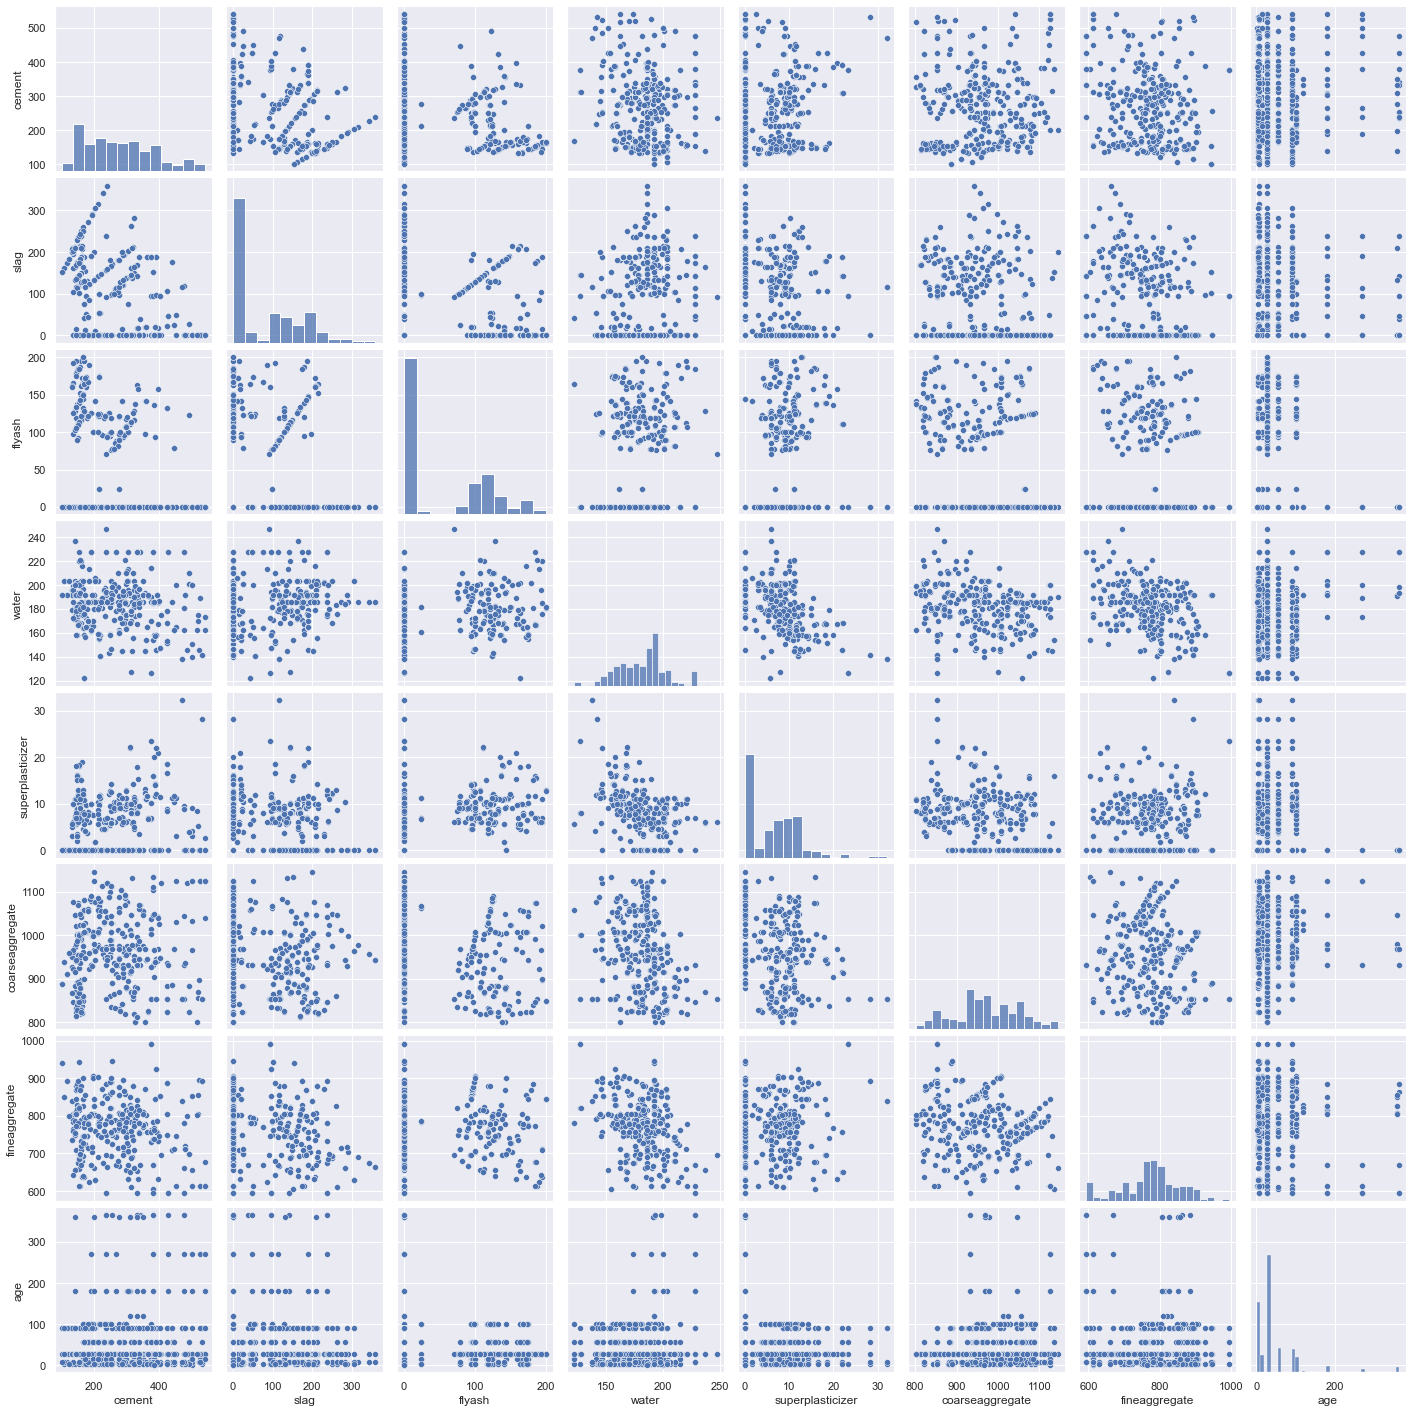

In [242]:
train_df = pd.DataFrame(X_train, columns=feature_names)
train_df['csMPa'] = Y_train
sns.pairplot(train_df, vars = feature_names)

## 5. Train linear regression model to predict csMPa values

In [243]:
model = linear_model.LinearRegression().fit(X_train, Y_train)

## 6. Report mean squared error and coefficient of determination for test data

In [244]:
# The coefficients:
print('Coefficients: \n', model.coef_)

Y_test_pred = model.predict(X_test)
# print("this is y test")
# print(Y_test)
# print("this is y test pred")
# print(Y_test_pred)

# The mean squared error:
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred))

# The coefficient of determination (1 is perfect prediction):
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_test_pred))

Coefficients: 
 [ 0.11923772  0.10881555  0.0911555  -0.14527714  0.31551104  0.02225423
  0.02248514  0.11520355]
Mean squared error: 95.62
Coefficient of determination: 0.64


In [245]:
pred_df = pd.DataFrame({'Actual': Y_test, 'Predicted':Y_test_pred})
pred_df.head()

,Actual,Predicted
747,26.06,39.161683
718,10.35,14.619856
175,79.30,61.440067
828,74.99,53.777042
713,9.69,24.668431


## 7. Plot predicted vs. actual csMPa values

Text(0, 0.5, 'Actual csMPa')

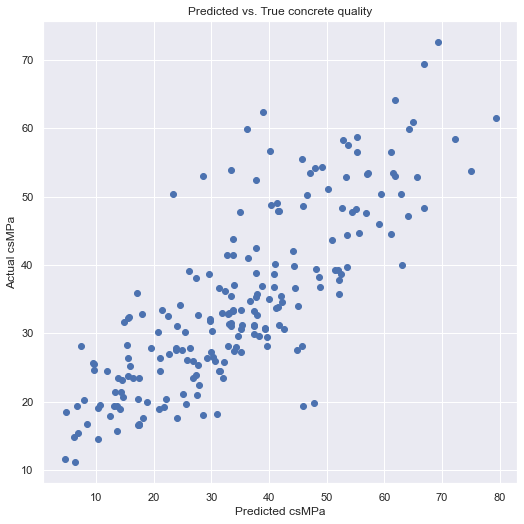

In [246]:
plt.scatter(Y_test,Y_test_pred)
plt.title('Predicted vs. True concrete quality')
plt.xlabel('Predicted csMPa')
plt.ylabel('Actual csMPa')